Ash Rai <br>
CSC 675: Neural Network and Deep Learning<br>
Spring 2021

# Deep Learning Project 2 : Part 2


Option #2: One network layer with 10 neurons

## Implementation

### Preprocessing

Loading the MNIST Dataset

In [20]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Importing necessary packages

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

Reshaping and standardising the images

In [22]:
train_images_flatten =  train_images.reshape(train_images.shape[0], -1).T
test_images_flatten = test_images.reshape(test_images.shape[0], -1).T

train_images_processed = train_images_flatten/255
test_images_processed = test_images_flatten/255

Processing labels to set it up for multi class classification

In [23]:
def process_label(label):
  # number of classes -> 10
  processed_label = np.zeros((label.shape[0], 10))

  for i in range(label.shape[0]):
    processed_label[i][label[i]] = 1

  return processed_label.T

In [25]:
print ("train_images_processed shape: " + str(train_images_processed.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images_processed shape: " + str(test_images_processed.shape))
print ("test_labels test_labels: " + str(test_labels.shape))

train_images_processed shape: (784, 60000)
train_labels shape: (60000,)
test_images_processed shape: (784, 10000)
test_labels test_labels: (10000,)


Initializing parameters

In [24]:
def initialize_random(dim, num_nodes):    
    w = np.random.randn(dim, num_nodes) * 0.01
    b = np.random.randn(num_nodes, 1) * 0.01

    assert(w.shape == (dim, num_nodes))
    
    return w, b

 ### Forward and Backward propagation

Softmax Activation Function

$$ \sigma (o_i) = \frac{e^{o_i}}{ \sum_{j=1}^n e^{o_j}}$$

In [26]:
def softmax(x):
    return np.exp(x) /  np.sum(np.exp(x), axis=0)

Here, loss function is:

$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - \sum_{i=1}^c y^{(i)}\log(a^{(i)})$$

And the cost function is:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

In [27]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)
    A = softmax(np.dot(w.T, X) + b)                              
    L = -np.sum(np.multiply(Y, np.log(A)), axis=0)
    cost = (1 / m) * np.sum(L)
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1 / m) * (np.dot(X, (A - Y).T))
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

Optimization

In [28]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):   
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

Prediction

In [29]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 10)
    
    A = softmax(np.dot(w.T, X) + b)
    # taking highest probable class for prediction
    Y_prediction = np.argmax(A, axis=0)
    
    return Y_prediction

Merge all functions into a model

In [30]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False, num_nodes = 10):
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_random(X_train.shape[0], num_nodes)

    train_labels_processed = process_label(Y_train)
  
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, train_labels_processed, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(np.sum(Y_train == Y_prediction_train)/X_train.shape[1] * 100))
    print("train accuracy: {} %".format(np.sum(Y_test == Y_prediction_test)/X_test.shape[1] * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## Results

Running the model for 2000 iterations with the learning rate of 0.1

In [ ]:
d = model(train_images_processed, train_labels, test_images_processed, test_labels, num_iterations = 2000, learning_rate = 0.1, print_cost = True)

Cost after iteration 0: 2.305483
Cost after iteration 100: 0.610611
Cost after iteration 200: 0.491846
Cost after iteration 300: 0.443305
Cost after iteration 400: 0.415463
Cost after iteration 500: 0.396867
Cost after iteration 600: 0.383316
Cost after iteration 700: 0.372868
Cost after iteration 800: 0.364488
Cost after iteration 900: 0.357568
Cost after iteration 1000: 0.351726
Cost after iteration 1100: 0.346705
Cost after iteration 1200: 0.342328
Cost after iteration 1300: 0.338466
Cost after iteration 1400: 0.335026
Cost after iteration 1500: 0.331934
Cost after iteration 1600: 0.329135
Cost after iteration 1700: 0.326585
Cost after iteration 1800: 0.324249
Cost after iteration 1900: 0.322098
train accuracy: 91.08833333333334 %
train accuracy: 91.49000000000001 %


Cost Function Trend

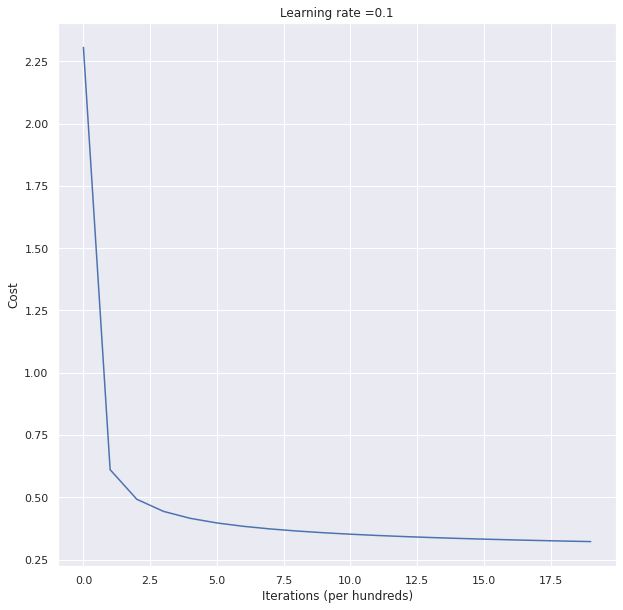

In [ ]:
import seaborn as sns

# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,10))
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

Confusion Matrix for Test Dataset

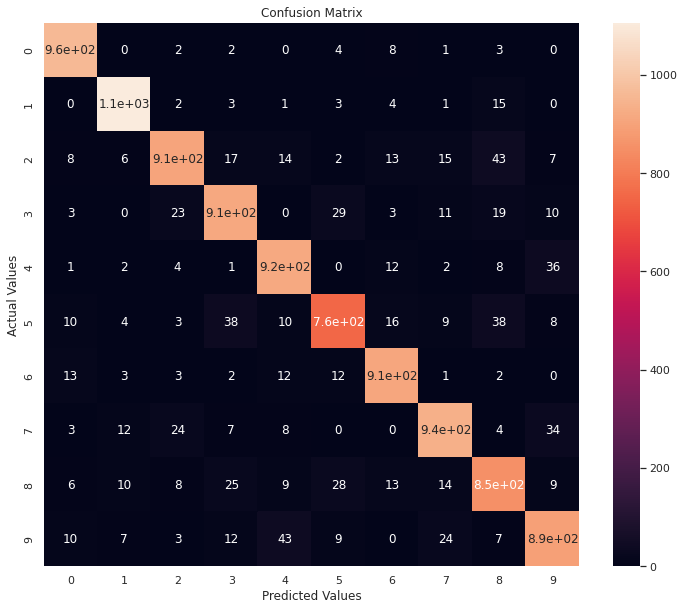

In [ ]:
from sklearn.metrics import confusion_matrix
predicted_y = d['Y_prediction_test']
confusion = confusion_matrix(test_labels, predicted_y)

plt.figure(figsize=(12,10))
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Comparing different learning rates

learning rate is: 0.1
train accuracy: 90.30333333333334 %
train accuracy: 90.84 %

-------------------------------------------------------

learning rate is: 0.01
train accuracy: 85.98666666666666 %
train accuracy: 87.03 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 77.49666666666667 %
train accuracy: 78.64 %

-------------------------------------------------------



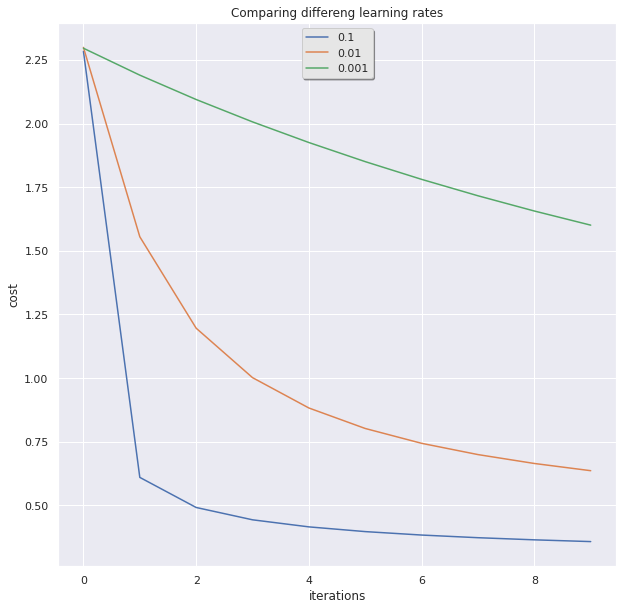

In [ ]:
import seaborn as sns

learning_rates = [0.1, 0.01, 0.001]
models = {}

for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_images_processed, train_labels, test_images_processed, test_labels, num_iterations = 1000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

plt.figure(figsize=(10,10))
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Comparing differeng learning rates")

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## Analysis


#### Paremeters
My classification model was a single layer network with 10 neurons. I chose the following parameters:

*   Learning Rate: 0.1
*   Number of Iterations: 2000
*   Train Dataset: Full train dataset from MNIST (60,000)
*   Test Dataset: Full test dataset from MNIST (10,000)

As can be seen in the 'Comparing differeng learning rates' section above, learning rate of 0.1 had the best accuracy results, and cost function trend. This is why learning rate of 0.1 was chosen.

<br>

#### Accuracy Analysis

For my model, the accuracy results were as follows:

* Train Accuracy: **91.09%**
* Test Accuracy: **91.49%**

The accuracy was not as high as for the best accuracy rates in part 1 of the project (i.e. 97% for '0' as a binary classification). However, I was expecting that since even though we have multiple neurons in here, the problem is more complex with 10 different classes (i.e. one for each digit). The accuracy of this model was better than the binary classification of some of the poorer ones from part 1 though (i.e. '5', '8', and '9' with about 87% to 90% accuracy rates)

<br>

#### Confusion Matrix Analysis

The confusion matrix here (drawn in results section) gives us a good insight on the performance of the model on each digit. The results were very similar to the previous projects, where digits '0' and '1' had the best performance, while '5' performed the poorest, followed by '8' and '9'. This is consistent with my previous findings based on binary classification as well as clustering, and I still think it is related to how '0' and '1' look distinct compared to other digits, while '5', '8' and '9' could look ambiguous.

